DATA COLLECTION
```
-> Collect the dataset or create the dataset
```

DATA PREPROCESSING


```
-> Import the libraries.
-> Import the dataset.
-> Check for null values.
-> Data Visualization.
-> Outlier Detection.
-> Splitting Dependent and Independent variables.
-> Encoding.
-> Feature Scaling.
-> Splitting Dataset into Train and Test.

```


MODEL BUILDING
```
-> Import the model building libraries.
-> Initializing the model.
-> Training and testing the model.
-> Evaluation of Model.
-> Save the model.
```


APPLICATION BUILDING
```
-> Create an HTML file.
-> Build a Python code.

```



# MULTI LINEAR REGRESSION

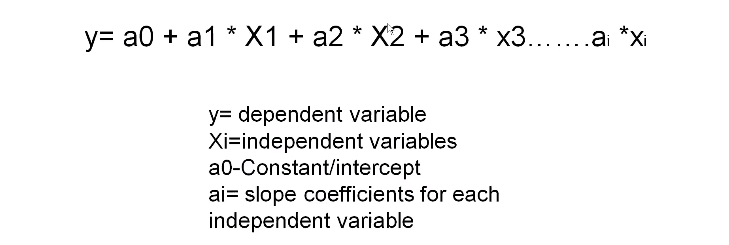

# ***i) DATA PREPROCESSING***

# 1) Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("50_Startups.csv")

In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,108.000000,108.000000,108.000000,108.000000
mean,74959.338704,121750.788889,214952.664722,113523.760000
std,44996.368152,27322.385654,117937.942120,38991.013654
min,0.000000,51283.140000,0.000000,14681.400000
25%,38558.510000,105077.645000,134050.070000,90708.190000
50%,75791.365000,122699.795000,239452.750000,109543.120000
75%,101913.080000,145077.580000,298664.470000,141585.520000
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        108 non-null    float64
 1   Administration   108 non-null    float64
 2   Marketing Spend  108 non-null    float64
 3   State            108 non-null    object 
 4   Profit           108 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.3+ KB


In [ ]:
corr = df.corr()
corr

<ipython-input-81-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241379,0.725978,0.964770
Administration,0.241379,1.000000,-0.024699,0.198849
Marketing Spend,0.725978,-0.024699,1.000000,0.748957
Profit,0.964770,0.198849,0.748957,1.000000


In [ ]:
# Correlation bw Marketing Spend and R&D is very high. Not good.
# Will have to fix this with HYPERPARAMETER TUNING

In [ ]:
# Order of correlation of all variables with "Profit"
df.corr().Profit.sort_values(ascending=True)

<ipython-input-83-5ef5815c1549>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().Profit.sort_values(ascending=True)


Administration     0.198849
Marketing Spend    0.748957
R&D Spend          0.964770
Profit             1.000000
Name: Profit, dtype: float64

# 3. Checking for null values

In [ ]:
df.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [ ]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
df.State.nunique()

3

In [ ]:
df.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [ ]:
df.State.value_counts()

New York      39
California    36
Florida       33
Name: State, dtype: int64

# 4) Data Visualization

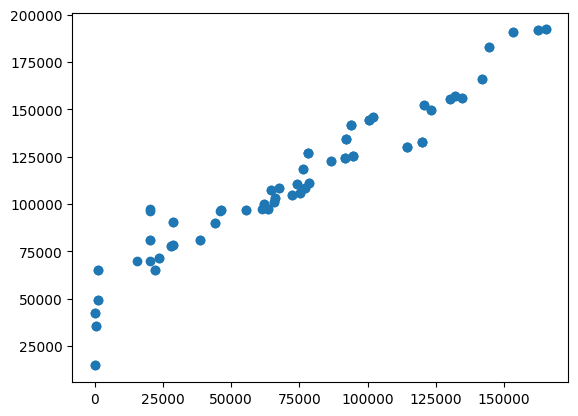

In [ ]:
plt.scatter(df["R&D Spend"], df["Profit"])

<Axes: >

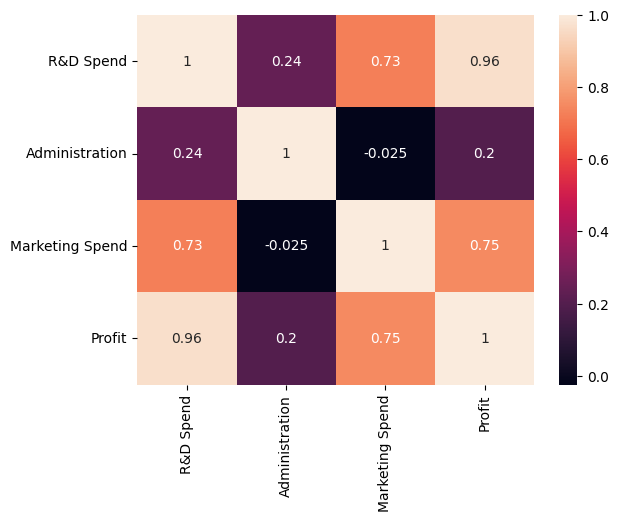

In [ ]:
sns.heatmap(corr, annot = True)

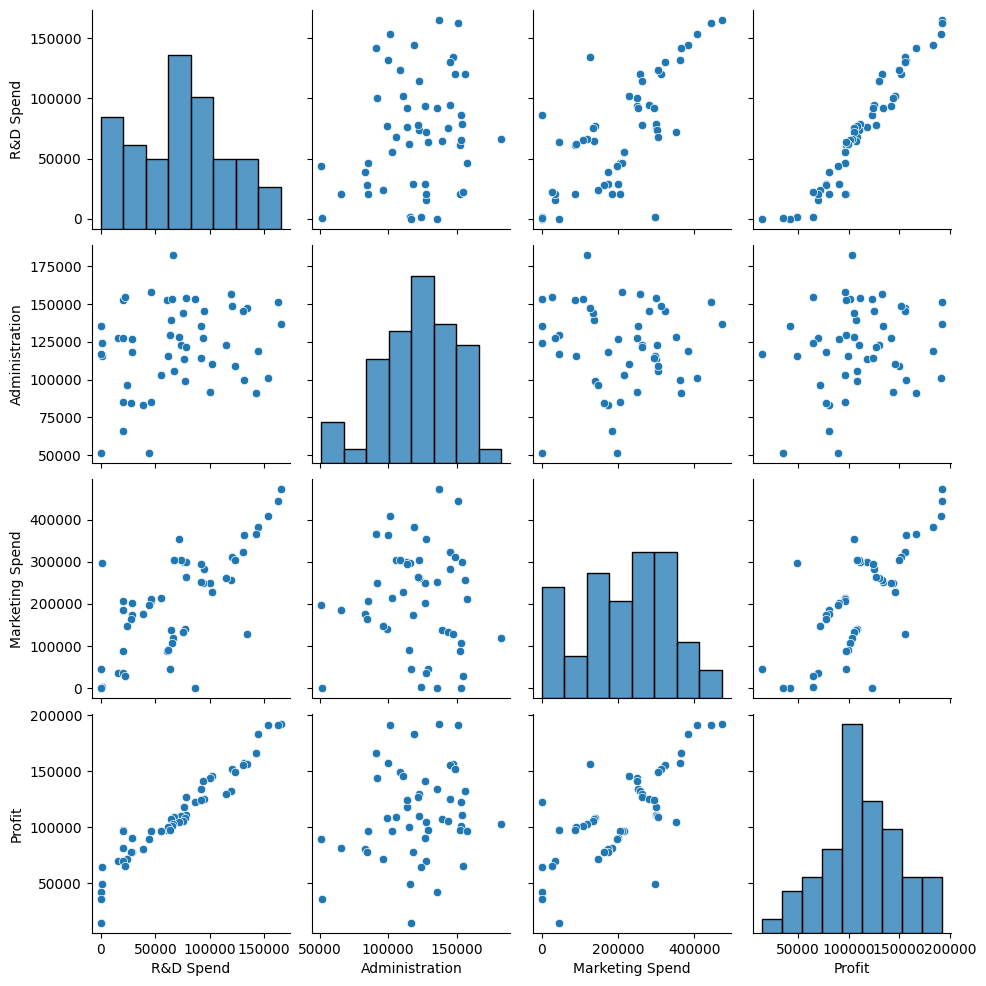

In [ ]:
sns.pairplot(df)

<ipython-input-92-68b4ca790ce0>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(x = df["State"], y = df["Profit"], ci=0)


<Axes: xlabel='State', ylabel='Profit'>

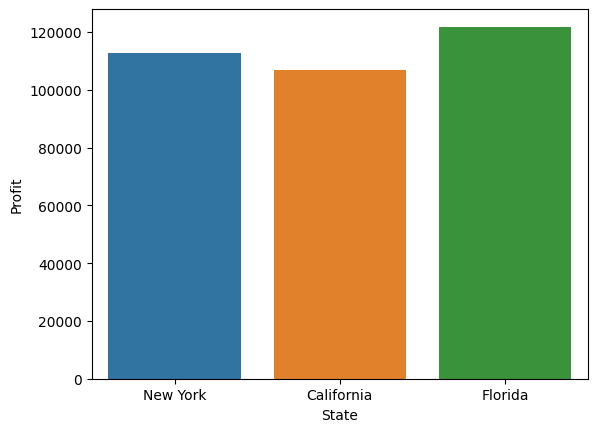

In [ ]:
sns.barplot(x = df["State"], y = df["Profit"], ci=0)

# 5. Outlier Detection

<Axes: >

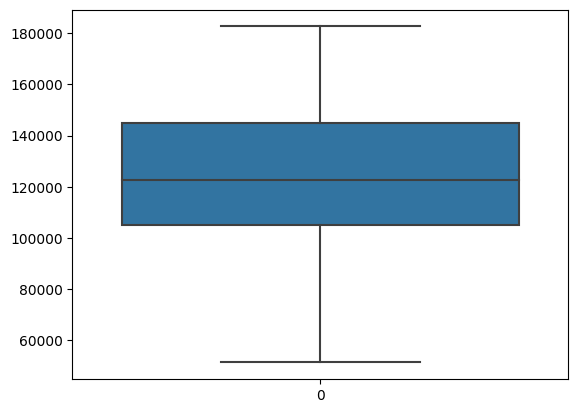

In [ ]:
sns.boxplot(df["Administration"])

<Axes: >

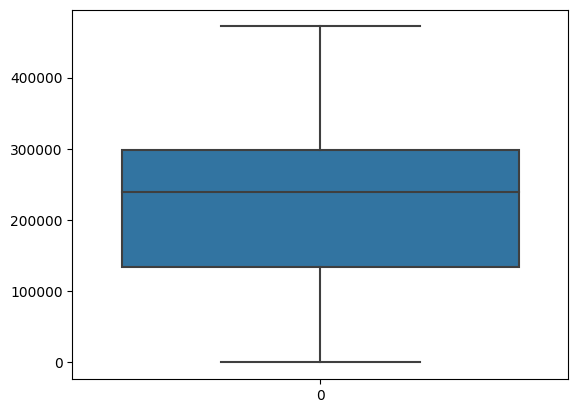

In [ ]:
sns.boxplot(df["Marketing Spend"])

<Axes: >

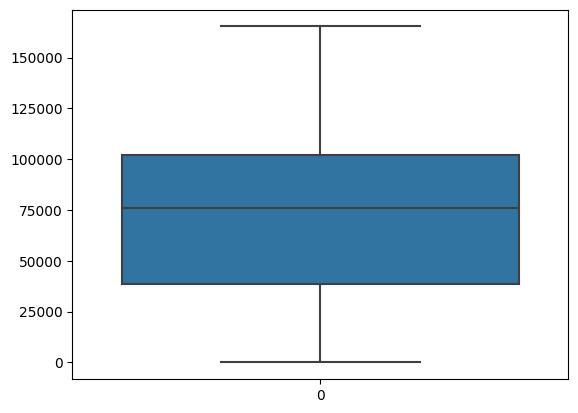

In [ ]:
sns.boxplot(df["R&D Spend"])

<Axes: >

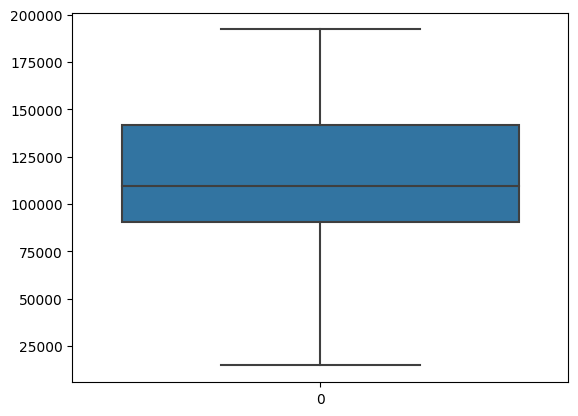

In [ ]:
sns.boxplot(df["Profit"])

# 6. Splitting Dependent and Independent Variable

In [ ]:
# X should be dataframe
# Y should be a series

X = df.drop(columns = "Profit", axis = 1)
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida
...,...,...,...,...
103,119943.24,156547.42,256512.92,Florida
104,114523.61,122616.84,261776.23,New York
105,78013.11,121597.55,264346.06,California
106,94657.16,145077.58,282574.31,New York


In [ ]:
X.shape

(108, 4)

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
Y = df["Profit"]

In [ ]:
Y.shape

(108,)

In [ ]:
type(Y)

pandas.core.series.Series

# 7. Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [ ]:
le = LabelEncoder()

In [ ]:
X["State"] = le.fit_transform(X["State"])

In [ ]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [ ]:
print(le.classes_)

['California' 'Florida' 'New York']


In [ ]:
mapping = dict(zip(le.classes_, range(len(le.classes_))))
mapping

{'California': 0, 'Florida': 1, 'New York': 2}

# 8. Feature Scaling

```
STANDARD SCALER
mean = 0, SD = 1

MINMAX SCALER
range bw 0 to 1
```



In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
ms = MinMaxScaler()
# applying fit transform on all columns with 1 command
X_Scaled = pd.DataFrame(ms.fit_transform(X), columns = X.columns)

In [ ]:
X_Scaled

,R&D Spend,Administration,Marketing Spend,State
0,1.000000,0.651744,1.000000,1.0
1,0.983359,0.761972,0.940893,0.0
2,0.927985,0.379579,0.864664,0.5
3,0.873136,0.512998,0.812235,1.0
4,0.859438,0.305328,0.776136,0.5
...,...,...,...,...
103,0.725394,0.801327,0.543708,0.5
104,0.692617,0.543030,0.554864,1.0
105,0.471808,0.535270,0.560312,0.0
106,0.572468,0.714013,0.598948,1.0


# 9. Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_Scaled, Y, test_size=0.2, random_state = 0)

In [ ]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(86, 4) (22, 4) (86,) (22,)


# ***MODEL BUILDING***
# RIDGE REGRESSION

# 1. Import the model Building Libraries

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# 2. Initializing the model

In [ ]:
ridge_regressor = Ridge()

parameters = {"alpha" : [1,2,3,5,10,20,30,40,50,60,70,80,90]} # We are going to test for all values of Lambda and use performance matrix to find out the best one.
ridgecv = GridSearchCV(ridge_regressor, parameters, scoring="neg_mean_squared_error", cv=5) # CV = cross-validation

# 3. Train the model

In [ ]:
ridgecv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [ ]:
ridgecv.best_params_ #alpha should never be zero.

{'alpha': 1}

In [ ]:
ridgecv.best_score_

-150424168.2214145


```
HYPER PARAMETERS:
Declared and specified before the building the model.
Lambda in this case.

PARAMETERS:
Assigned by the model while training.
For eg : m1, m2, m3, intercepts.
```

K FOLD CROSS VALIDATAION :

```
Dividing training set into number of sets.
And then further dividing the sets into training and validation set with each iteration.

```

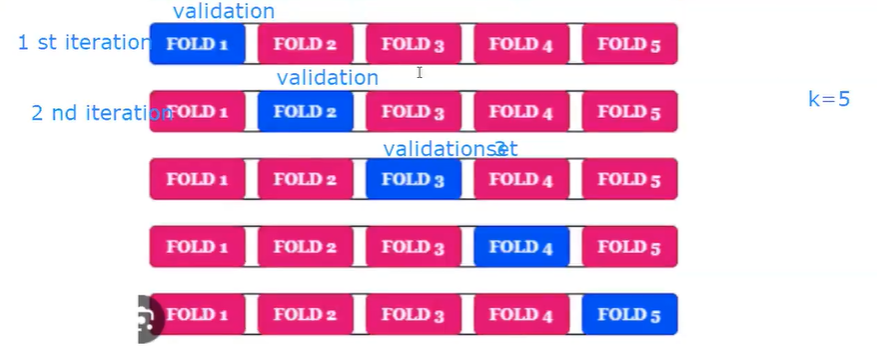

# 4. Testing the Model

In [ ]:
Y_pred = ridgecv.predict(X_test)
Y_pred

array([ 54556.32416702, 130017.92166782,  84687.15947095, 173295.2223158 ,
       108917.94957822, 128735.89224253, 128736.35934265, 155951.19177423,
       117814.48562718,  52712.59507338, 102790.3781561 , 119096.2726001 ,
        54556.32416702, 124206.72612243,  88379.01243395, 126261.35613731,
       126261.35613731,  98802.1865801 ,  74278.88209886, 141546.67661999,
       145564.21281487, 150251.73759042])

In [ ]:
Y_test

84      64926.08
10     146121.95
75      90708.19
2      191050.39
24     108552.04
100    144259.40
107    124266.90
7      155752.60
16     126992.93
86      42559.73
68     101004.64
22     110352.25
45      64926.08
60     111313.02
76      89949.14
52     134307.35
13     134307.35
73      96712.80
85      49490.75
54     129917.04
103    132602.65
8      152211.77
Name: Profit, dtype: float64

In [ ]:
profit = pd.DataFrame(
    {
        "Actual_profit" : Y_test,
        "Predicted_profit" : Y_pred
    }
                      )

In [ ]:
profit

,Actual_profit,Predicted_profit
84,64926.08,54556.324167
10,146121.95,130017.921668
75,90708.19,84687.159471
2,191050.39,173295.222316
24,108552.04,108917.949578
100,144259.40,128735.892243
107,124266.90,128736.359343
7,155752.60,155951.191774
16,126992.93,117814.485627
86,42559.73,52712.595073


# 5. Random Value Prediction

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
ridgecv.predict([[153241.51, 101545.55, 408134.54, 1]])
# State input converted into numerical value as per encoding. [BW 0-2]
# Observe that the answer is still too huge [i.e predicted Profit value]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([2.97486705e+10])

In [ ]:
# IMPORTANT
# using minmax scaler transform on the input data to make it understandable by the lr model
ridgecv.predict(ms.transform([[153241.51, 101545.55, 408134.54, 1]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([173211.90911749])

# 6. Evaluation of Model

In [ ]:
from sklearn import metrics

In [ ]:
# R-square
# evaluating testing accuracy
print(metrics.r2_score(Y_test,Y_pred))

0.9095565216441847


In [ ]:
# evaluating accuracy on training data
print(metrics.r2_score(Y_train,ridgecv.predict(X_train)))

0.920686926857262


In [ ]:
# mean squared error
print(metrics.mean_squared_error(Y_test,Y_pred))

117186385.76630378


In [ ]:
# RMSE
print(np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

10825.266082933194


In [ ]:
# Mean absolute error
print(metrics.mean_absolute_error(Y_test,Y_pred))

8864.674945619769


# LASSO REGRESSION

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
lasso = Lasso()
parameters = {"alpha" : [1,2,3,5,10,20,30,40,50,60,70,80,90]} # We are going to test for all values of Lambda and use performance matrix to find out the best one.
lassocv = GridSearchCV(lasso, parameters, scoring="neg_mean_squared_error", cv=5) # CV = cross-validation

In [ ]:
lassocv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 3, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [ ]:
lassocv.best_params_

{'alpha': 90}

In [ ]:
lassocv.best_score_

-110721757.0014207

In [ ]:
Y_pred_lasso = lassocv.predict(X_test)

In [ ]:
Y_test

84      64926.08
10     146121.95
75      90708.19
2      191050.39
24     108552.04
100    144259.40
107    124266.90
7      155752.60
16     126992.93
86      42559.73
68     101004.64
22     110352.25
45      64926.08
60     111313.02
76      89949.14
52     134307.35
13     134307.35
73      96712.80
85      49490.75
54     129917.04
103    132602.65
8      152211.77
Name: Profit, dtype: float64

In [ ]:
Y_train_predict_lasso = lassocv.predict(X_train)

In [ ]:
profit = pd.DataFrame(
    {
        "Actual_profit" : Y_test,
        "Predicted_profit" : Y_pred_lasso
    }
                      )

In [ ]:
profit

,Actual_profit,Predicted_profit
84,64926.08,48927.837919
10,146121.95,134528.921803
75,90708.19,76912.546205
2,191050.39,180627.510835
24,108552.04,112577.523837
100,144259.40,133912.049144
107,124266.90,128972.146014
7,155752.60,159791.131496
16,126992.93,116903.731773
86,42559.73,47332.312472


In [ ]:
# R-square
# evaluating testing accuracy
print(metrics.r2_score(Y_test,Y_pred))

# evaluating accuracy on training data
print(metrics.r2_score(Y_train,ridgecv.predict(X_train)))

# mean squared error
print(metrics.mean_squared_error(Y_test,Y_pred))

# RMSE
print(np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

# Mean absolute error
print(metrics.mean_absolute_error(Y_test,Y_pred))

0.9095565216441847
0.920686926857262
117186385.76630378
10825.266082933194
8864.674945619769


In [ ]:
lassocv.predict(ms.transform([[153241.51, 101545.55, 408134.54, 1]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([180479.87508542])

# Linear Regression with Ordinary Least Square (OLS)

In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.OLS(Y_train, X_train).fit()
prediction = model.predict(X_test)
prediction

84      40729.658668
10     125715.802262
75      78276.580387
2      178294.833362
24      99606.661881
100    114195.293178
107    127685.712251
7      169881.155797
16     111836.797748
86      32777.338895
68     108777.868047
22     119741.110576
45      40729.658668
60     140152.512072
76      53215.304174
52     125560.034171
13     125560.034171
73     109318.123196
85      66091.629765
54     148597.322205
103    159234.879137
8      168682.082094
dtype: float64

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              1048.
Date:                Tue, 17 Oct 2023   Prob (F-statistic):                    1.65e-69
Time:                        06:28:44   Log-Likelihood:                         -957.92
No. Observations:                  86   AIC:                                      1924.
Df Residuals:                      82   BIC:                                      1934.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend        1.143e+05   1.07e+04     10.659      0.000    9.29e+04    1.36e+05
Administration   5.117e+04   6464.156      7.916      0.000    3.83e+04     6.4e+04
Marketing Spend  5.451e+04   9934.576      5.487      0.000    3.47e+04    7.43e+04
State            1.143e+04   4160.872      2.748      0.007    3155.541    1.97e+04
==============================================================================
Omnibus:                        5.934   Durbin-Watson:                   1.737
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                3.407
Skew:                          -0.283   Prob(JB):                        0.182
Kurtosis:                       2.206   Cond. No.                         7.87
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""